In [31]:
import pandas as pd
import numpy as np 
import sdv
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    roc_curve,
)

from imblearn.over_sampling import SMOTE


In [ ]:
diabetes_data = pd.read_csv('/Users/genesisoyelaja/Desktop/Gee Library (Global)/🐍Python Repository/Activity_Syntheticdatageneration/diabetes.csv')

print(diabetes_data.head()) #print the first 5 rows of the dataset

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
dimension = diabetes_data.shape #shape of the data structure stores in the variable 'dimension'

print(f'Dimension of the data: {dimension}') #dimension of the data

print(f'Number of rows: {dimension[0]}') #number of rows

print(f'Number of columns: {dimension[1]}') #number of columns

Dimension of the data: (768, 9)
Number of rows: 768
Number of columns: 9


In [11]:
print (diabetes_data.info()) #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [14]:
print( diabetes_data.isnull().sum()) #check for null values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
class_count = diabetes_data['Outcome'].value_counts() #count the number of classes in the dataset
print(f'Class Count: {class_count}') #print the class count

Class Count: Outcome
0    500
1    268
Name: count, dtype: int64


Text(0, 0.5, 'Count')

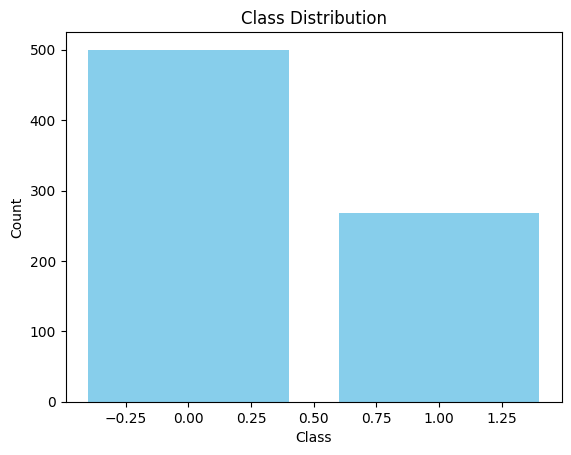

In [20]:
plt.bar(class_count.index, class_count.values, color = ['skyblue'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [ ]:
x = diabetes_data.drop('Outcome', axis = 1) #drop the outcome column from the dataset
y = diabetes_data['Outcome'] #store the outcome column in the variable y

#split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size= 0.2, stratify=y) #stratify = y ensures that the class distribution is preserved in both the training and testing sets
print(f'Training set size: {x_train.shape[0]}') #print the size of the training set
print(f'Testing set size: {x_test.shape[0]}') #print the size of the testing set

Training set size: 614
Testing set size: 154


In [29]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

In [37]:
# before applying SMOTE
print(f'Before SMOTE: , {y_train.value_counts()}')

#after applying SMOTE
print(f'\n After applying SMOTE: {y_train_smote.value_counts()}')

Before SMOTE: , Outcome
0    400
1    214
Name: count, dtype: int64

 After applying SMOTE: Outcome
0    400
1    400
Name: count, dtype: int64


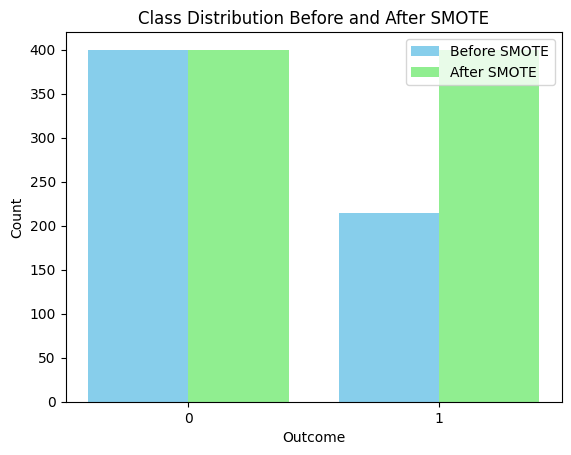

In [39]:
# Visualize the new class distribution
counts_before = y_train.value_counts()
counts_after = y_train_smote.value_counts()

plt.bar([0, 1], [counts_before.get(0, 0), counts_before.get(1, 0)], width=0.4, label='Before SMOTE', color='skyblue')
plt.bar([0.4, 1.4], [counts_after.get(0, 0), counts_after.get(1, 0)], width=0.4, label='After SMOTE', color='lightgreen')

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['0', '1'])
plt.legend()
plt.show()

In [45]:
# Initialize the models
model_orig = LogisticRegression(solver='liblinear', max_iter=200)
model_smote = LogisticRegression(solver='liblinear', max_iter=200)

# Train the model on original data
model_orig.fit(x_train_scaled, y_train)

# Train the model on SMOTE data
model_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=200, solver='liblinear')

In [42]:
# Make predictions on the test set
y_pred_orig = model_orig.predict(x_test_scaled)
y_pred_smote = model_smote.predict(x_test_scaled)

# Predictions probability for ROC-AUC
y_prob_orig = model_orig.predict_proba(x_test_scaled)[:, 1]
y_prob_smote = model_smote.predict_proba(x_test_scaled)[:, 1]

# Evaluate the model's performance
def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [43]:
print("Performance on Original Data:")
evaluate_model(y_test, y_pred_orig, y_prob_orig)

Performance on Original Data:
Accuracy: 0.7143
Precision: 0.6087
Recall: 0.5185
ROC-AUC: 0.8233

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



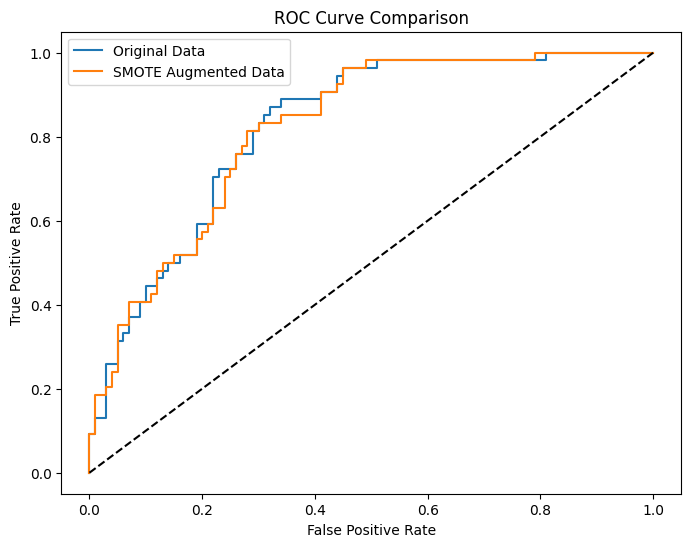

In [47]:
# Plot ROC curves
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_orig)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, label='Original Data')
plt.plot(fpr_smote, tpr_smote, label='SMOTE Augmented Data')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()